In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Lenovo\Documents\15 days project datasets\bank dataset.csv")
df

,occupation,age,education_level,marital_status,communication_channel,call_month,call_day,call_duration,call_frequency,previous_campaign_outcome,conversion_status
0,administrative_staff,28,high_school,married,unidentified,September,9,1,1,successful,not_converted
1,administrative_staff,58,unidentified,married,unidentified,June,5,307,2,unidentified,not_converted
2,jobless,40,high_school,divorced,mobile,February,4,113,1,unidentified,not_converted
3,retired_worker,63,high_school,married,mobile,April,7,72,5,unidentified,not_converted
4,business_owner,43,college,married,landline,July,29,184,4,unidentified,not_converted
...,...,...,...,...,...,...,...,...,...,...,...
45206,administrative_staff,50,high_school,divorced,mobile,May,6,114,1,unsuccessful,not_converted
45207,independent_worker,49,college,married,unidentified,May,13,98,1,unidentified,not_converted
45208,executive,30,college,married,mobile,June,12,175,2,other_outcome,not_converted
45209,retired_worker,59,elementary_school,married,landline,July,15,41,5,unidentified,not_converted


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   occupation                 45211 non-null  object
 1   age                        45211 non-null  int64 
 2   education_level            45211 non-null  object
 3   marital_status             45211 non-null  object
 4   communication_channel      45211 non-null  object
 5   call_month                 45211 non-null  object
 6   call_day                   45211 non-null  int64 
 7   call_duration              45211 non-null  int64 
 8   call_frequency             45211 non-null  int64 
 9   previous_campaign_outcome  45211 non-null  object
 10  conversion_status          45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [4]:
df.describe()

,age,call_day,call_duration,call_frequency
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


 - Age:
   - The average age of customers is approximately 41 years old.
   - The youngest customer is 18 years old, and the oldest is 95 years old.
   - Most customers fall between the ages of 33 and 48, as indicated by the 25th and 75th percentiles.
   
 - Call Day:
    - Calls were made throughout the month, with an average day of around the 16th of the month.
    - The earliest call was made on the 1st day of the month, and the latest was on the 31st.
    
 - Call Duration:
     - The average call duration is approximately 258 seconds (about 4.3 minutes).
    - The shortest call duration recorded was 0 seconds, while the longest call lasted for almost 82 minutes (4918 seconds).
    - Most call durations fall between 103 and 319 seconds, as indicated by the 25th and 75th percentiles.
    
 - Call Frequency:
   - On average, customers were contacted around 2 to 3 times during the campaign period.
   - The minimum call frequency recorded was 1, indicating that some customers were contacted only once.
   - The maximum call frequency recorded was 63, suggesting that some customers were contacted multiple times, possibly due to follow-up calls or special circumstances.

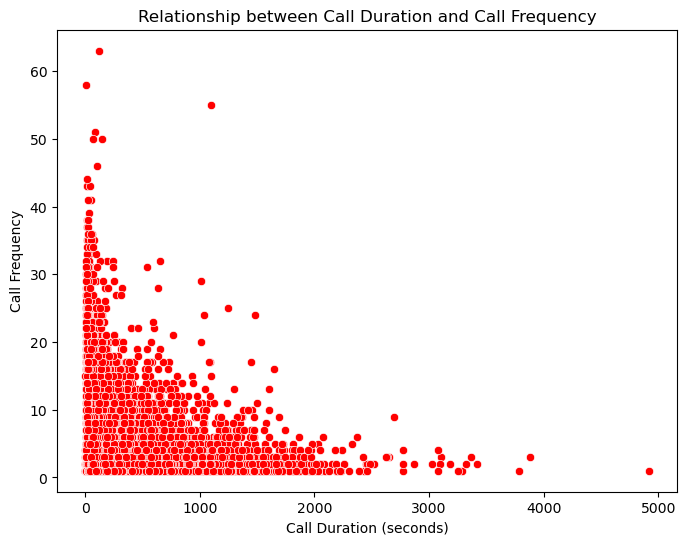

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='call_duration', y='call_frequency', data=df,color = 'r')
plt.title('Relationship between Call Duration and Call Frequency')
plt.xlabel('Call Duration (seconds)')
plt.ylabel('Call Frequency')
plt.show()

 - Call duration increases, call frequency tends to decrease. This suggests that longer calls are associated with fewer overall interactions
 

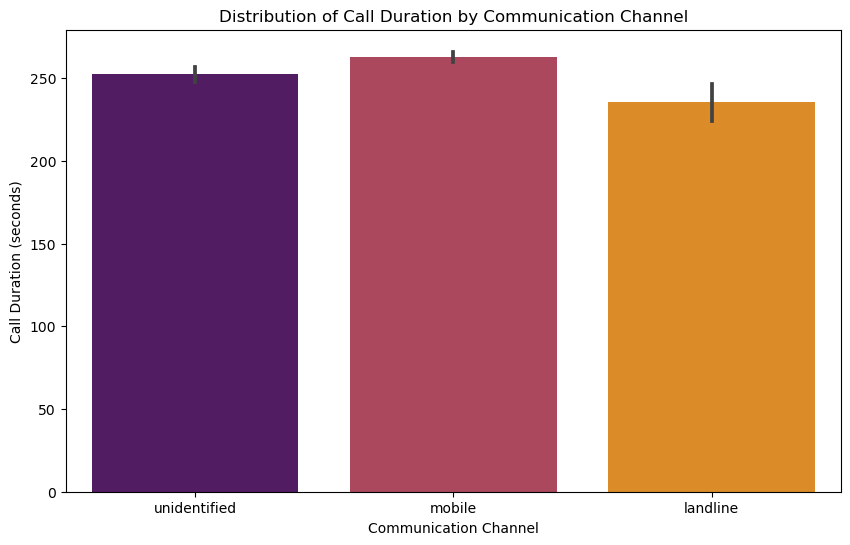

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x='communication_channel', y='call_duration', data=df,palette = 'inferno')
plt.title('Distribution of Call Duration by Communication Channel')
plt.xlabel('Communication Channel')
plt.ylabel('Call Duration (seconds)')
plt.show()

 - Calls from unidentified sources and mobiles tend to have similar durations, around 250 seconds.
-  Landline calls are slightly shorter, averaging less than 200 seconds.

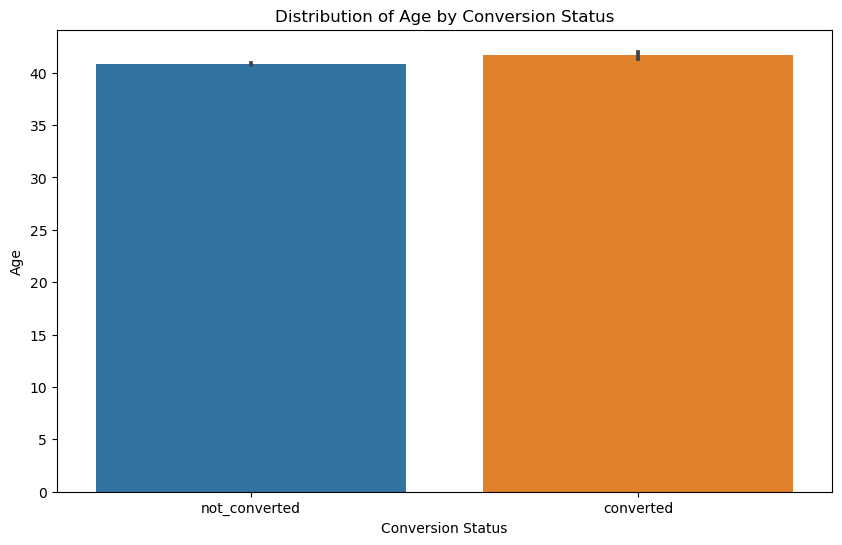

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x='conversion_status', y='age', data=df)
plt.title('Distribution of Age by Conversion Status')
plt.xlabel('Conversion Status')
plt.ylabel('Age')
plt.show()

 - Both categories exhibit similar average ages, around 40 years.
 -  Age might not be a significant factor in determining conversion status.

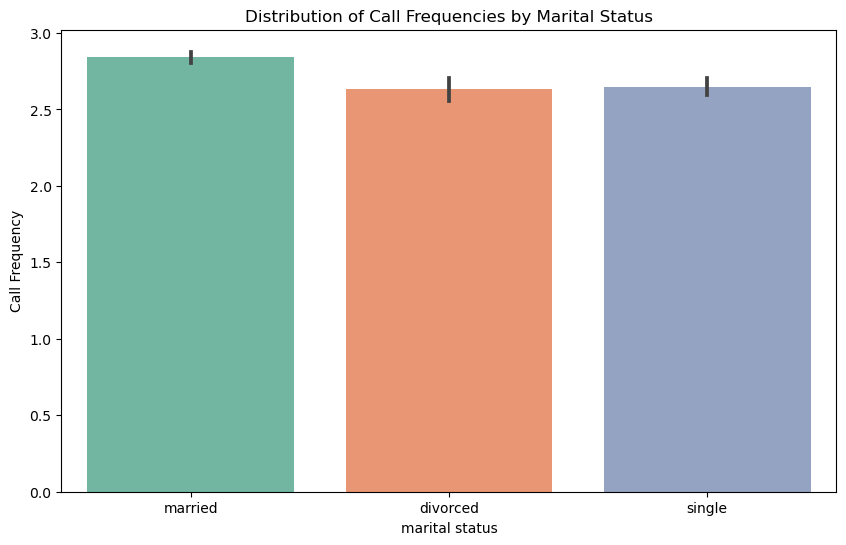

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x='marital_status', y='call_frequency', data=df,palette = 'Set2')
plt.title('Distribution of Call Frequencies by Marital Status')
plt.xlabel('marital status')
plt.ylabel('Call Frequency')
plt.show()

 - Married individuals have the highest call frequency.
 - Single and Divorced individuals closely follow, with similar call frequencies.


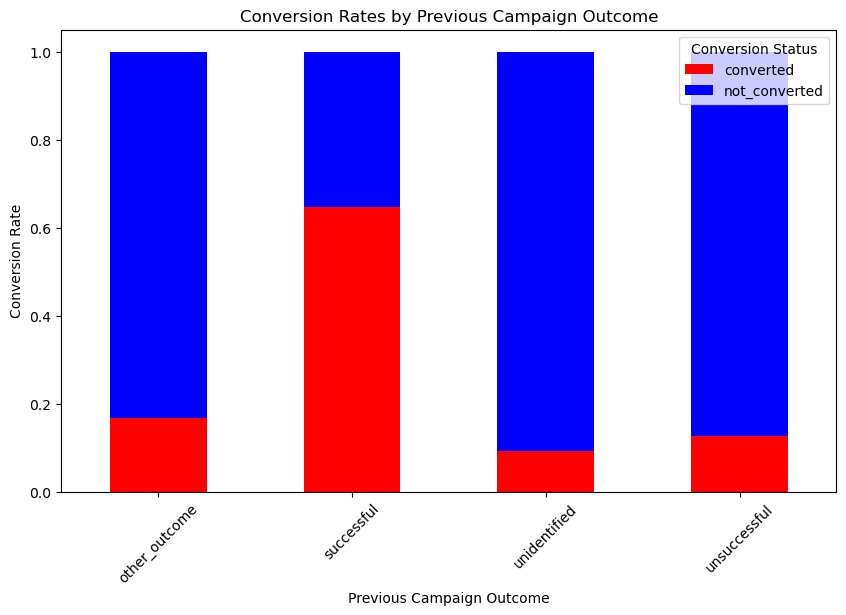

In [32]:
conversion_rates = df.groupby('previous_campaign_outcome')['conversion_status'].value_counts(normalize=True).unstack()
conversion_rates.plot(kind='bar', stacked=True, figsize=(10, 6), color=['red', 'blue'])
plt.title('Conversion Rates by Previous Campaign Outcome')
plt.xlabel('Previous Campaign Outcome')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45)
plt.legend(title='Conversion Status')
plt.show()

 - When the previous campaign was successful, more customers converted.
 - Unsuccessful or unidentified outcomes had lower conversion rates.

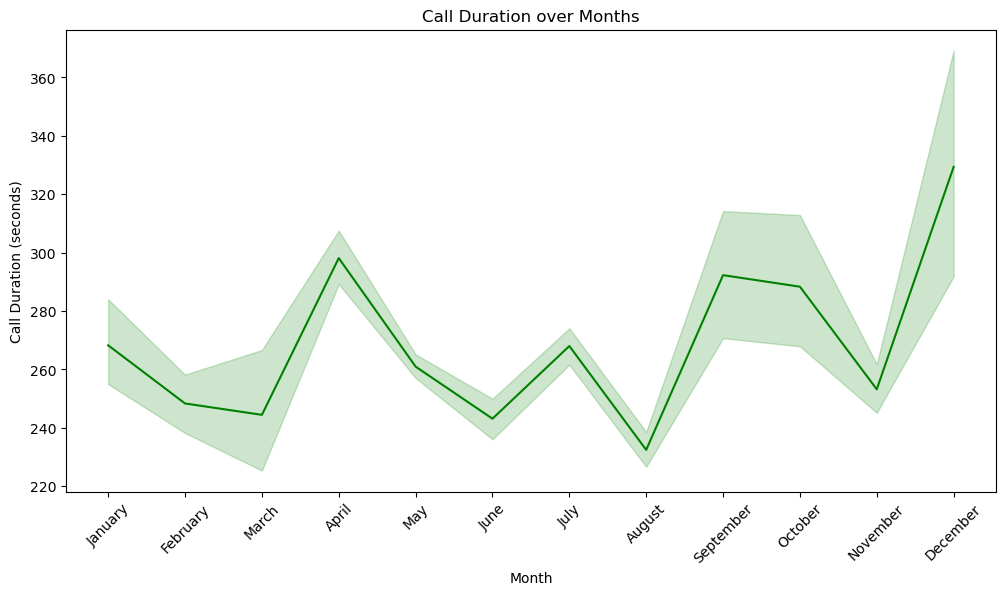

In [38]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='call_month', y='call_duration',color = 'g')
plt.title('Call Duration over Months')
plt.xlabel('Month')
plt.ylabel('Call Duration (seconds)')
plt.xticks(rotation=45)
plt.show()

 - Call duration fluctuates throughout the year.
 - Notable dips occur in August and March.
 - A significant increase is observed in December.

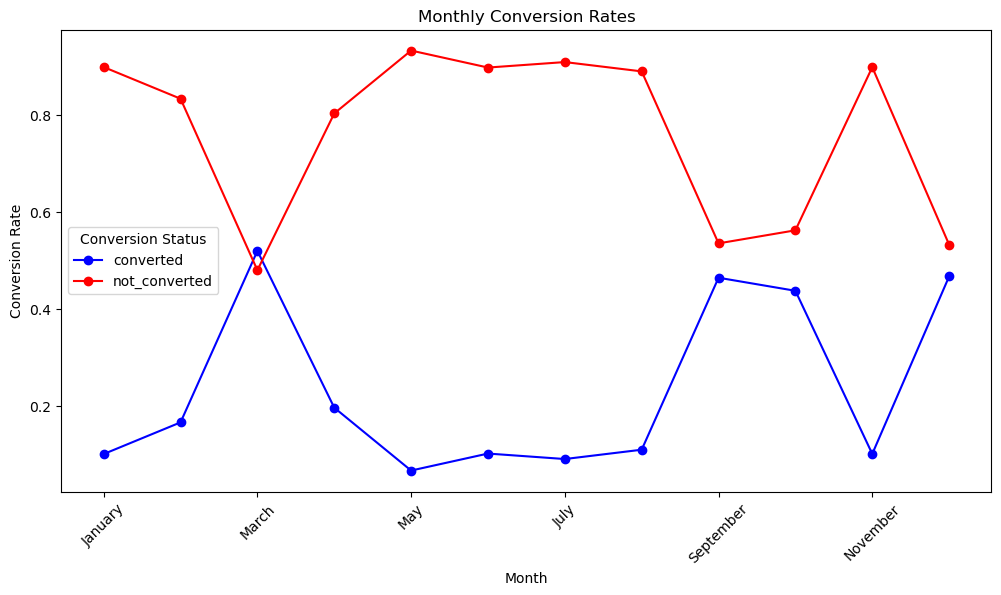

In [41]:
conversion_rates_monthly = df.groupby('call_month')['conversion_status'].value_counts(normalize=True).unstack()
conversion_rates_monthly.plot(kind='line', marker='o', figsize=(12, 6), color=['blue', 'red'])
plt.title('Monthly Conversion Rates')
plt.xlabel('Month')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45)
plt.legend(title='Conversion Status')
plt.show()

 - In March, there was a spike in conversions
 - September also had higher conversion rates
 - Notably, March had a dip in non-conversions